In [32]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [33]:
df = pandas.read_csv('datasetSerieTemporal.csv')

In [34]:
df.shape

(365, 2)

In [35]:
df.columns

Index(['Data', 'Total_Vendas'], dtype='object')

In [36]:
df.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [37]:
df.info()
#A data teve problema, pois esta setada como object(string) precisa ser um date time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [38]:
df['Data'] = pandas.to_datetime(df['Data'])
#Esta tranformando a coluna em datetime
#Pandas tem esses to_..... para vários tipos de dados. bem útil

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [40]:
serie_temporal = df.set_index('Data')['Total_Vendas']
#Cria uma serie com a coluna Data como o index e Total_Vendas é a coluna com os dados

In [41]:
type(serie_temporal)
#Aqui mostra que quando coloca o index como datetime cria automaticamente uma serie ao invés de dataframe

pandas.core.series.Series

In [42]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

In [43]:
serie_temporal = serie_temporal.asfreq('D')
#Aqui fala que os dados são Diários, ou seja, as datas mostram Dias
#Se fosse mensal seria 'M' provavelmente, 'Y' para year, etc

In [44]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

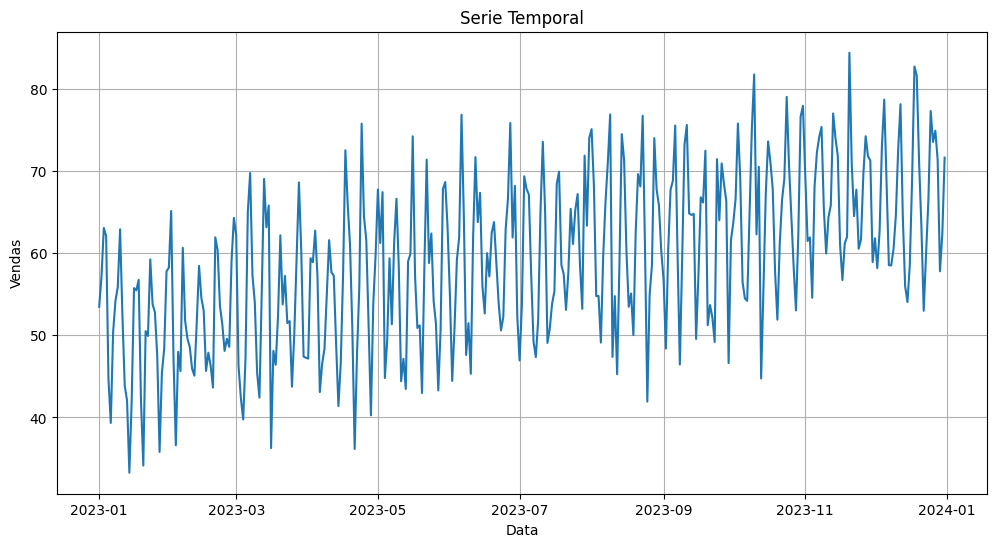

In [45]:
#Gráfico da série temporal
plt.figure(figsize=(12, 6))#Seta o tamanho do gráfico
plt.plot(serie_temporal)#Cria o gráfico com a serie temporal
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Serie Temporal')
plt.grid()

Criação e treinamento do modelo

In [46]:
#Cria o modelo
modelo = SimpleExpSmoothing(serie_temporal)

In [69]:
#Treina o modelo
modelo_treinado = modelo.fit(smoothing_level=1)#smoothing level controla que os pesos dos dados diminuem ao longo do tempo
                                #Este tipo de modelo faz uma média ponderada dos dados, os pesos diminuem exponencial com o tempo

d:\Python\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [70]:
#Extrai as previsões do modelo
suavização_exponencial = modelo_treinado.fittedvalues

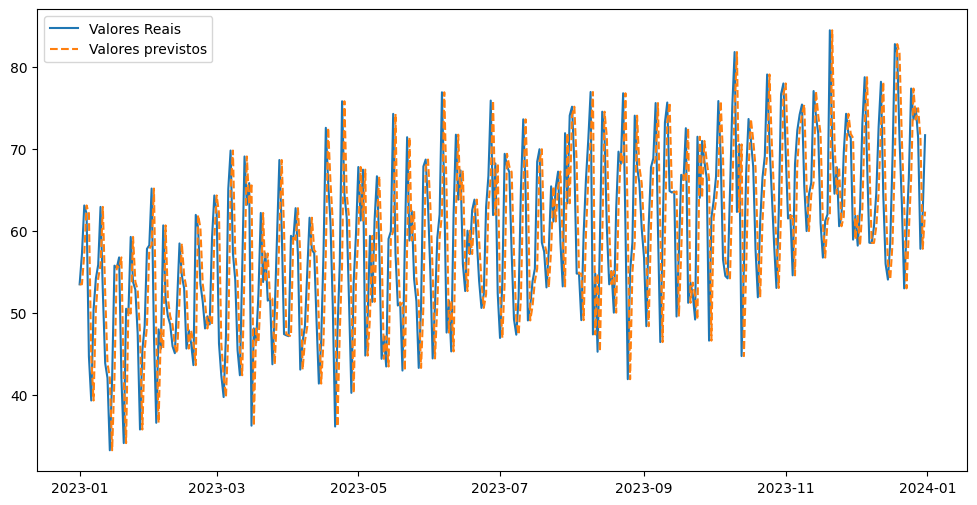

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal, label= 'Valores Reais')#Vai ficar um gráfico em cima do outro
plt.plot(suavização_exponencial, label = 'Valores previstos', linestyle = '--')
plt.legend()

Aqui foi uma previsão dos dados históricos, foi uma avaliação do modelo, imagino que foi bom. Abaixo ficara a previsão de tempo sobre o futuro

In [74]:
num_previsoes = 10 #Como a serie é diária, sera a previsão para o próximo dia, caso fosse mensal seria pro próximo mes, etc
previsao = modelo_treinado.forecast(steps = num_previsoes)
#forecast é a função para prever os valores, steps é a quantidade de dias (nesse caso) que vai rodar

In [75]:
print('Previsão de Vendas', round(previsao, 4))#Arredonda o valor da previsão para 4 digitos

Previsão de Vendas 2024-01-01    71.6507
2024-01-02    71.6507
2024-01-03    71.6507
2024-01-04    71.6507
2024-01-05    71.6507
2024-01-06    71.6507
2024-01-07    71.6507
2024-01-08    71.6507
2024-01-09    71.6507
2024-01-10    71.6507
Freq: D, dtype: float64


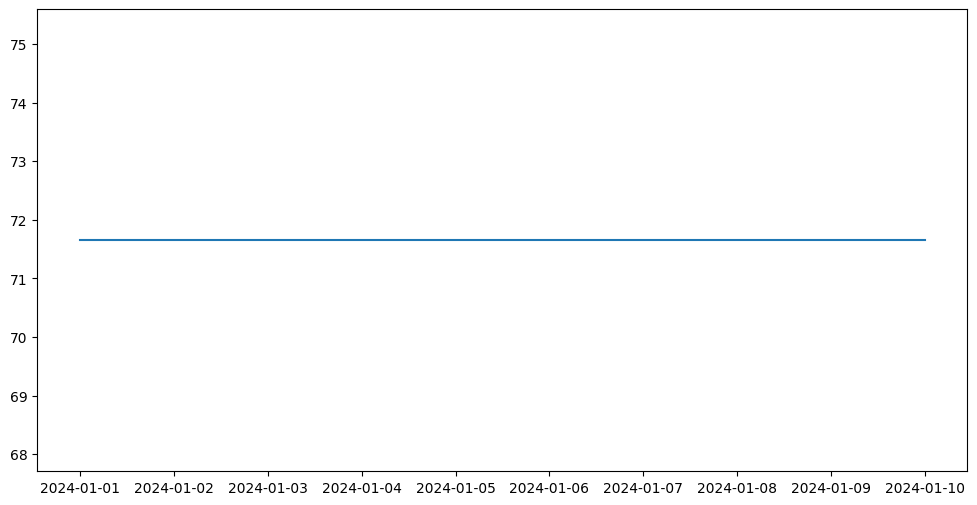

In [76]:
plt.figure(figsize=(12, 6))
plt.plot(previsao, label='Previsões')